In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data2=pd.read_csv("salarydatatrain.csv")
data=pd.read_csv("salarydatatest.csv")

In [3]:
data

age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
0            Adm-clerical   Not-in-family   White     Male         2174   
1         Exec-managerial         Husband   White     Male            0   
2       Handlers-cleaners   Not-in-family   White     Male            0   
3       Handlers-cleaners         Husband   Black     Male            0   
4          Prof-specialty            Wife   Black   Female            0   
...                   ...             ...     ...      ...          ...   
30156        Tech-support            Wife   White   Female            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30158        Adm-clerical       Unmarried   White   Female            0   
30159        Adm-clerical       Own-child   White     Male            0   
30160     Exec-managerial            Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
0                0            40   United-States   <=50K  
1                0            13   United-States   <=50K  
2                0            40   United-States   <=50K  
3                0            40   United-States   <=50K  
4                0            40            Cuba   <=50K  
...            ...           ...             ...     ...  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K  

[30161 rows x 14 columns]

In [4]:
data2

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0                0            0            40   United-States   <=50K  
1                0            0            50   United-States   <=50K  
2                0            0            40   United-States    >50K  
3             7688            0            40   United-States    >50K  
4                0            0            30   United-States   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[15060 rows x 14 columns]

In [5]:
print(data.isna().sum())
data2.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64


age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
print(data.isnull().sum())
data2.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64


age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
#convert categorical into numerical
Le = LabelEncoder()
for i in  ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]:
        data[i]= Le.fit_transform(data[i])
        data2[i]=Le.fit_transform(data2[i])

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'workclass'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'educationno'}>],
       [<Axes: title={'center': 'maritalstatus'}>,
        <Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'relationship'}>,
        <Axes: title={'center': 'race'}>],
       [<Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'capitalgain'}>,
        <Axes: title={'center': 'capitalloss'}>,
        <Axes: title={'center': 'hoursperweek'}>],
       [<Axes: title={'center': 'native'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

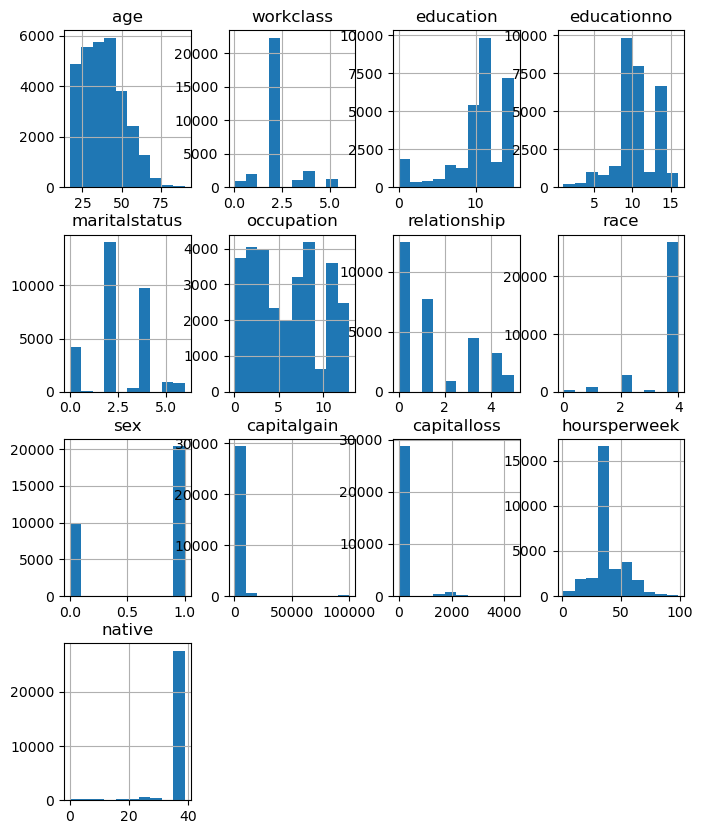

In [8]:
data.hist(figsize=(8,10))

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'workclass'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'educationno'}>],
       [<Axes: title={'center': 'maritalstatus'}>,
        <Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'relationship'}>,
        <Axes: title={'center': 'race'}>],
       [<Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'capitalgain'}>,
        <Axes: title={'center': 'capitalloss'}>,
        <Axes: title={'center': 'hoursperweek'}>],
       [<Axes: title={'center': 'native'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

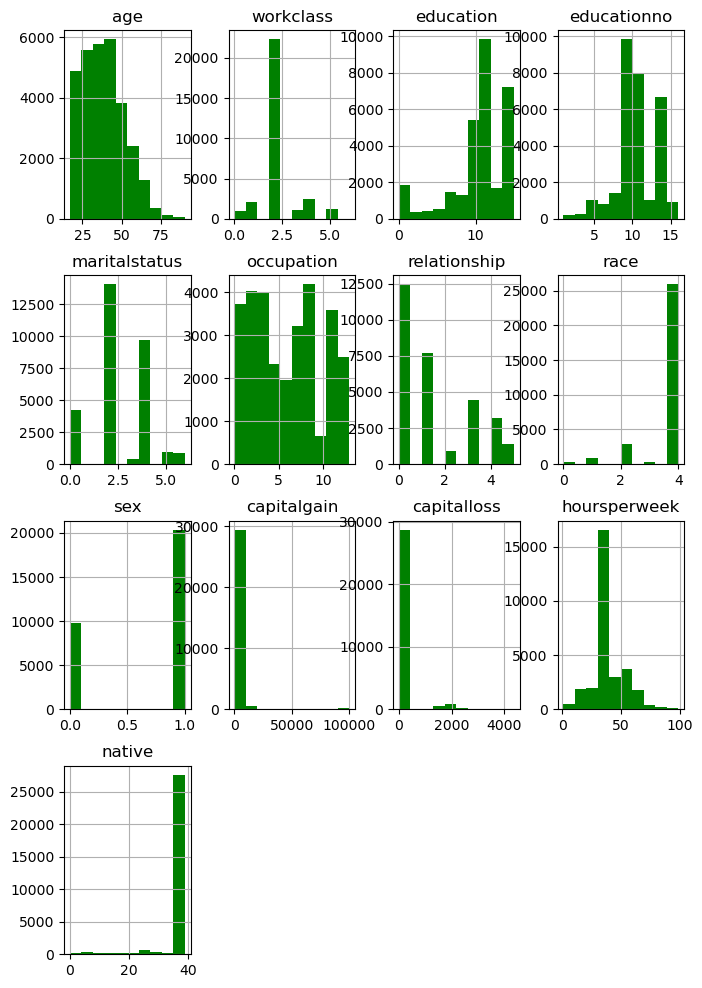

In [9]:
data.hist(figsize=(8,12),color="green")

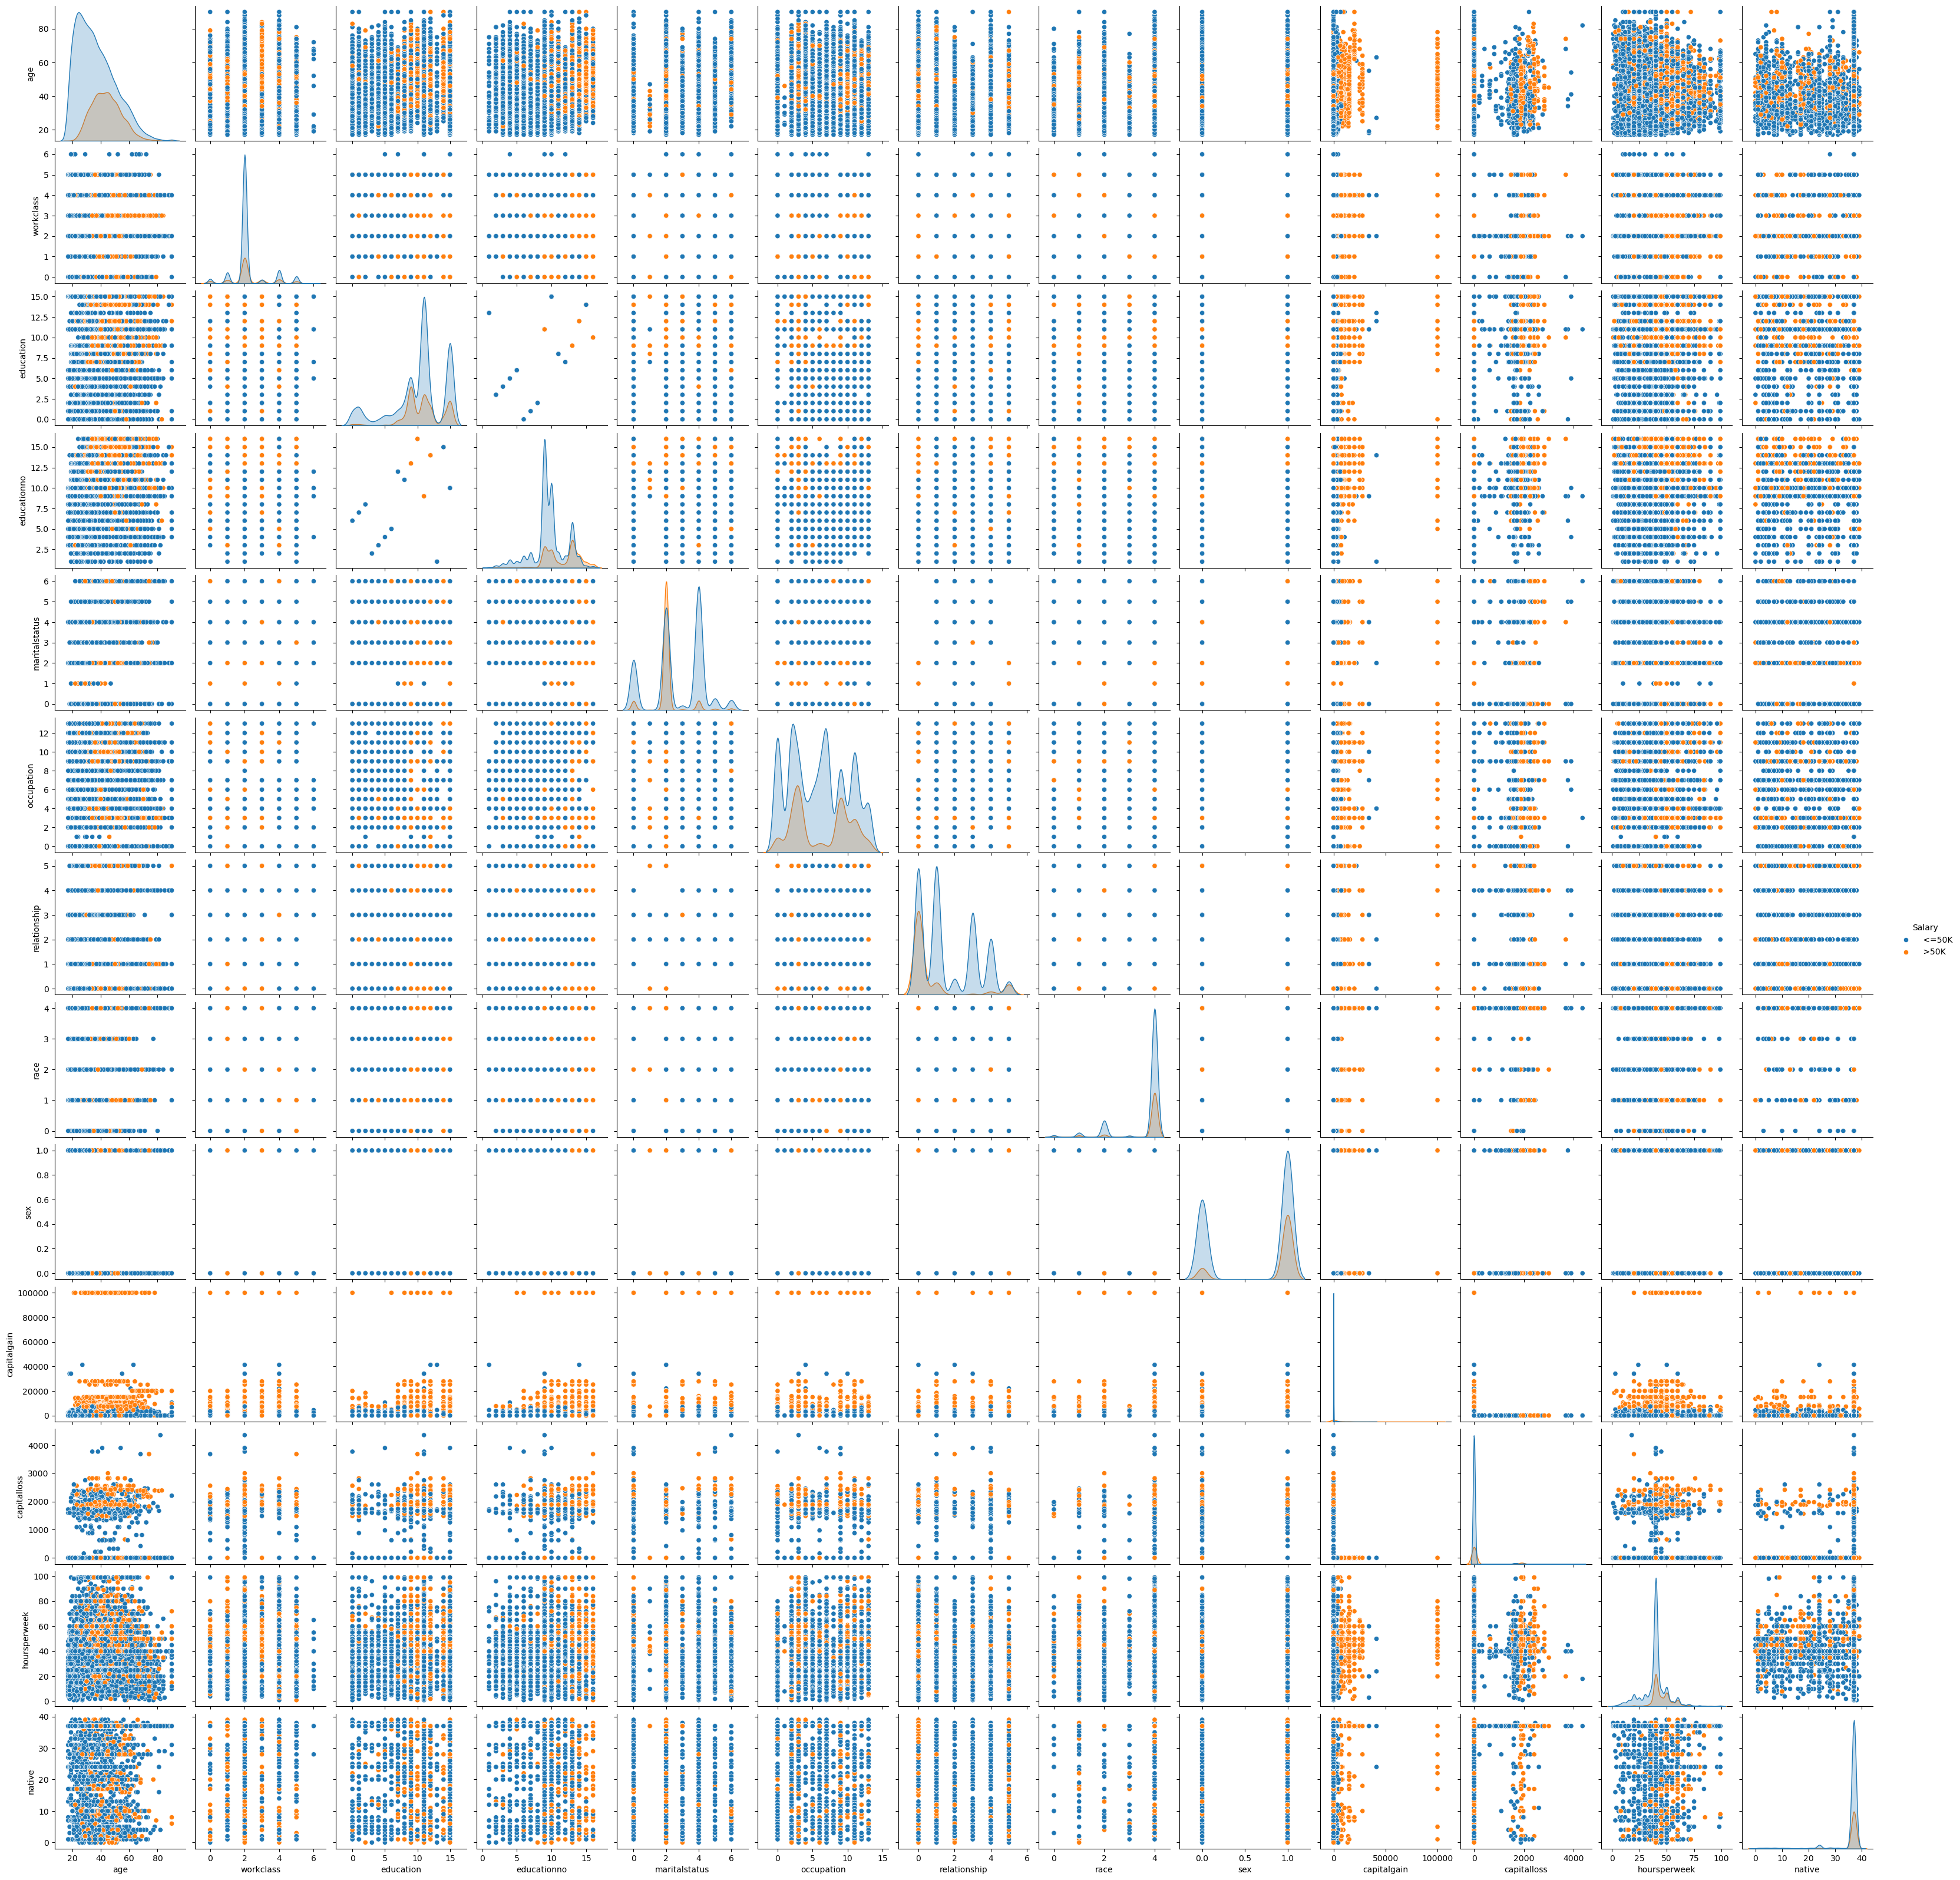

In [10]:
sns.pairplot(data,hue="Salary")

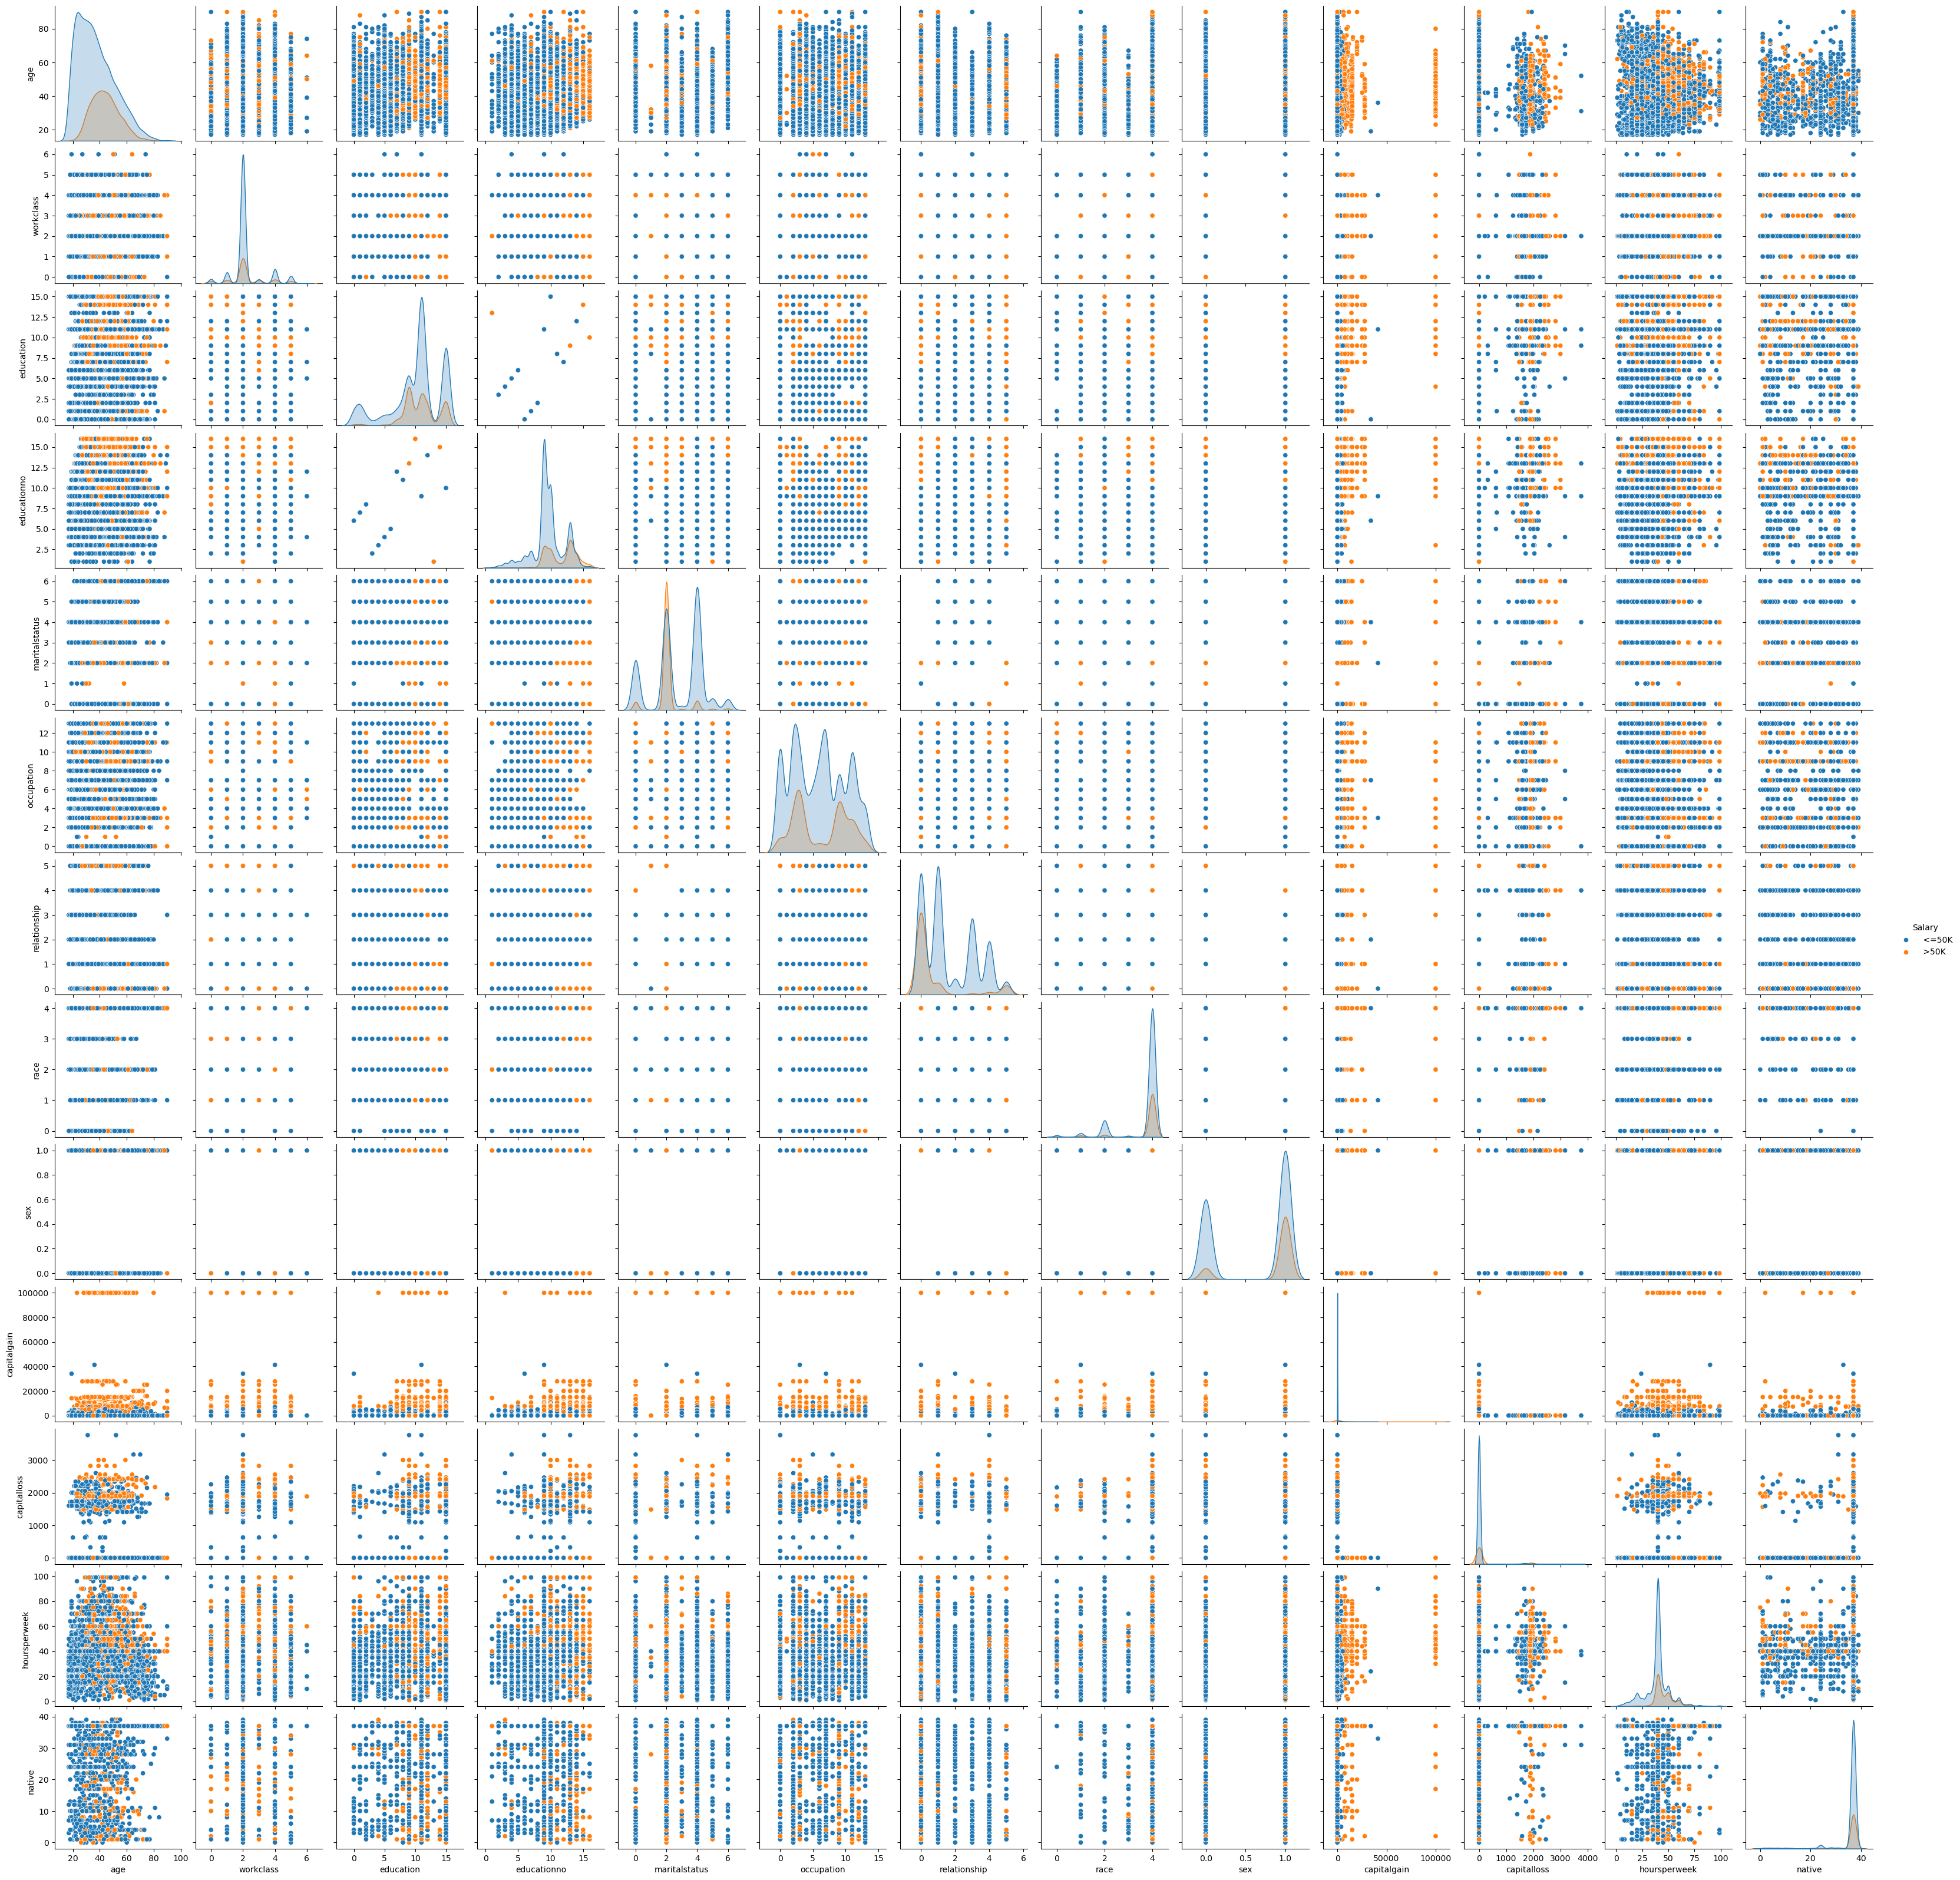

In [11]:
sns.pairplot(data2,hue="Salary")

<Axes: xlabel='education', ylabel='hoursperweek'>

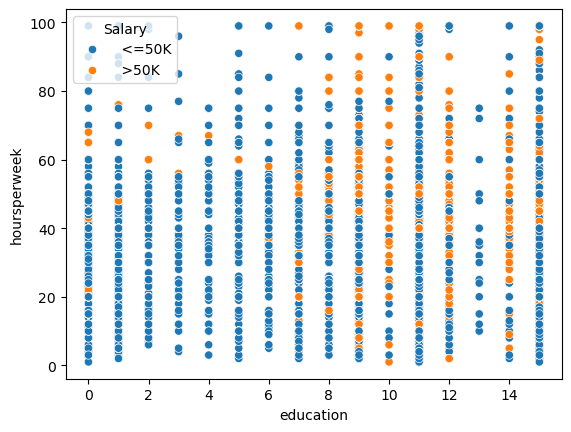

In [12]:
sns.scatterplot(x=data["education"],y=data["hoursperweek"],hue=data["Salary"])


<Axes: xlabel='race', ylabel='count'>

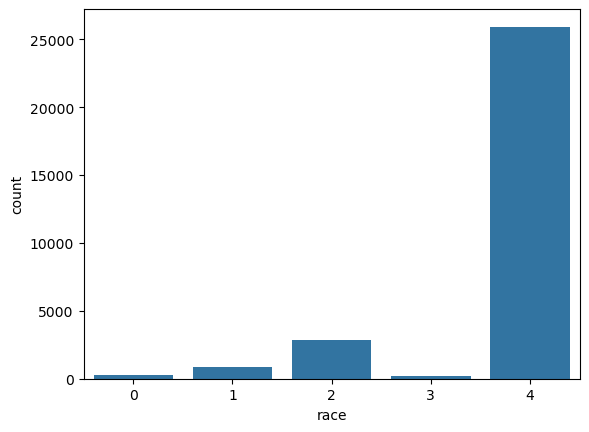

In [13]:
sns.countplot(x=data["race"],data=data)

<Axes: xlabel='race', ylabel='count'>

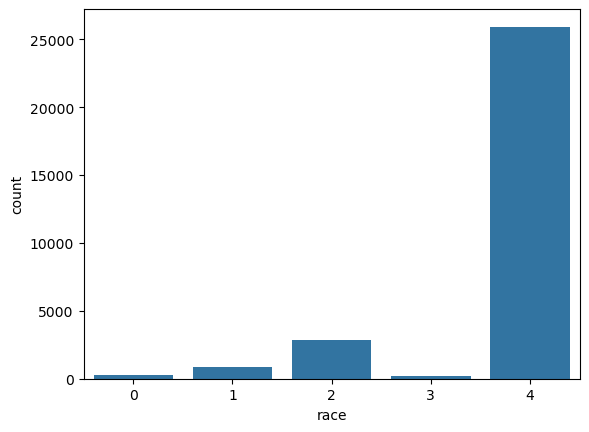

In [14]:
sns.countplot(x=data["race"],data=data2)

In [15]:
x_train=data.iloc[:,:13]
y_train=data.iloc[:,13]

In [16]:
x_test=data2.iloc[:,:13]
y_test=data2.iloc[:,13]

In [17]:
#normalise
##Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)


In [18]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

In [19]:
# svm linear model
model_linear = SVC(kernel = "linear",random_state=40,gamma=0.1,C=1.0)
model_linear.fit(x_train,y_train)


SVC(gamma=0.1, kernel='linear', random_state=40)

In [20]:
pred_linear = model_linear.predict(x_test)
print(np.mean(pred_linear==y_test))

0.8096945551128818


In [21]:
#svm poly model
model_poly = SVC(kernel = "poly",random_state=40,gamma=0.1,C=1.0)
model_poly.fit(x_train,y_train)
pred_poly = model_poly.predict(x_test)
np.mean(pred_poly==y_test)

0.8205179282868525

In [22]:
#svm rbf model 
model_rbf = SVC(kernel = "rbf",random_state=40,gamma=0.1,C=1.0)
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
np.mean(pred_test_rbf==y_test)

0.8280876494023904

In [23]:
#svm sigmoid model
model_sig = SVC(kernel = "sigmoid",random_state=40,gamma=0.1,C=1.0)
model_sig.fit(x_train,y_train)
pred_test_sig = model_rbf.predict(x_test)
np.mean(pred_test_sig==y_test) #

0.8280876494023904

In [24]:
# svm grid search
clf= SVC()
parma_grid = [{'kernel' : ["rbf"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]

In [25]:
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 40},
 0.8294490262517703)

In [26]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 80.64409030544488


array([[10365,   995],
       [ 1920,  1780]], dtype=int64)

In [27]:
#svm linear grid searh
clf= SVC()
parma_grid = [{'kernel' : ["linear"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'linear', 'random_state': 40},
 0.8118431562437083)

In [28]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 80.64409030544488


array([[10365,   995],
       [ 1920,  1780]], dtype=int64)

In [29]:
#svm poly grid search
clf= SVC()
parma_grid = [{'kernel' : ["poly"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)
gsv.best_params_ , gsv.best_score_

({'C': 1.0, 'gamma': 0.1, 'kernel': 'poly', 'random_state': 40},
 0.819137640901382)

In [30]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 80.64409030544488


In [31]:
#svm sigmoid grid search
clf= SVC()
parma_grid = [{'kernel' : ["sigmoid"],'random_state':[40],'gamma':[0.1],'C':[1.0]}]
gsv = GridSearchCV(clf,parma_grid,cv=10)
gsv.fit(x_train,y_train)
gsv.best_params_ , gsv.best_score_


({'C': 1.0, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 40},
 0.7951661847233493)

In [32]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 80.64409030544488
